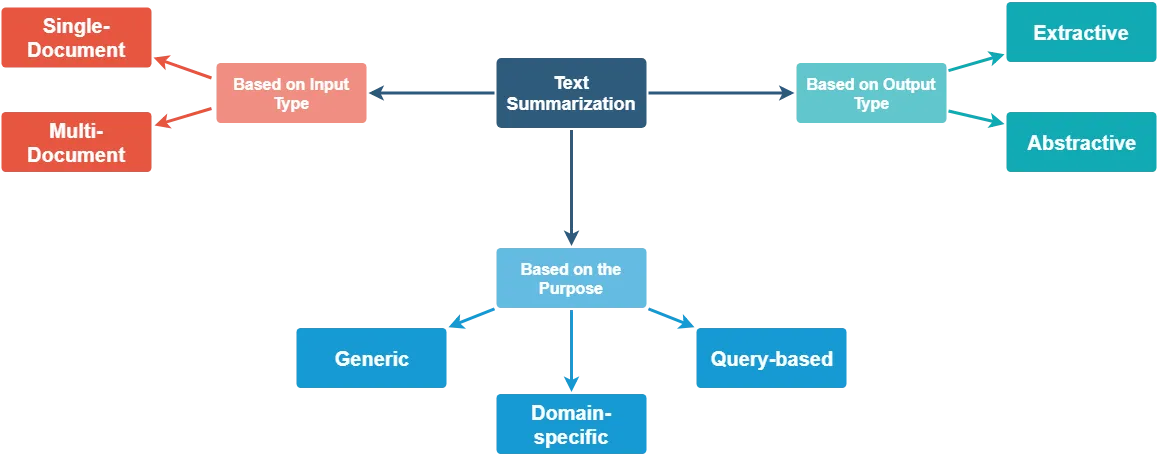

## How to do text summarization
- Text cleaning  
- Sentence tokenization  
- Word tokenization  
- Word-frequency table  
- Summarization  

## Text Cleaning

In [2]:
#!pip install -U spacy

     -------------------------------------- 12.3/12.3 MB 595.9 kB/s eta 0:00:00
     -------------------------------------- 96.8/96.8 kB 135.2 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 630.8 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 696.9 kB/s eta 0:00:00
     ------------------------------------ 482.8/482.8 kB 657.3 kB/s eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 821.8 kB/s eta 0:00:00
     -------------------------------------- 45.9/45.9 kB 565.4 kB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 732.5 kB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 539.8 kB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5


In [3]:
#!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 324.7 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

In [4]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [5]:
stopwords = list(STOP_WORDS)

In [6]:
nlp = spacy.load('en_core_web_sm')

In [8]:
 text = """
 Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. 
 I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. 
 I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players.
 I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all.
 I think just because you're in the same sport doesn't mean that you have to be friends with everyone just because you're categorized, you're a tennis player, so you're going to get along with tennis players. 
 I think every person has different interests. I have friends that have completely different jobs and interests, and I've met them in very different parts of my life.
 I think everyone just thinks because we're tennis players we should be the greatest of friends. But ultimately tennis is just a very small part of what we do. 
 There are so many other things that we're interested in, that we do.'
 """

In [9]:
doc = nlp(text)

In [10]:
tokens = [token.text for token in doc]
print(tokens)

['\n', 'Maria', 'Sharapova', 'has', 'basically', 'no', 'friends', 'as', 'tennis', 'players', 'on', 'the', 'WTA', 'Tour', '.', 'The', 'Russian', 'player', 'has', 'no', 'problems', 'in', 'openly', 'speaking', 'about', 'it', 'and', 'in', 'a', 'recent', 'interview', 'she', 'said', ':', "'", 'I', 'do', "n't", 'really', 'hide', 'any', 'feelings', 'too', 'much', '.', '\n', 'I', 'think', 'everyone', 'knows', 'this', 'is', 'my', 'job', 'here', '.', 'When', 'I', "'m", 'on', 'the', 'courts', 'or', 'when', 'I', "'m", 'on', 'the', 'court', 'playing', ',', 'I', "'m", 'a', 'competitor', 'and', 'I', 'want', 'to', 'beat', 'every', 'single', 'person', 'whether', 'they', "'re", 'in', 'the', 'locker', 'room', 'or', 'across', 'the', 'net', '.', '\n', 'So', 'I', "'m", 'not', 'the', 'one', 'to', 'strike', 'up', 'a', 'conversation', 'about', 'the', 'weather', 'and', 'know', 'that', 'in', 'the', 'next', 'few', 'minutes', 'I', 'have', 'to', 'go', 'and', 'try', 'to', 'win', 'a', 'tennis', 'match', '.', '\n', 'I'

In [11]:
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

## Word tokenization

In [14]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1

In [16]:
print(word_frequencies)

{'Maria': 1, 'Sharapova': 1, 'basically': 1, 'friends': 5, 'tennis': 6, 'players': 6, 'WTA': 1, 'Tour': 1, 'Russian': 1, 'player': 2, 'problems': 1, 'openly': 1, 'speaking': 1, 'recent': 1, 'interview': 1, 'said': 2, 'hide': 1, 'feelings': 1, 'think': 4, 'knows': 1, 'job': 1, 'courts': 2, 'court': 1, 'playing': 1, 'competitor': 1, 'want': 1, 'beat': 1, 'single': 1, 'person': 2, 'locker': 1, 'room': 1, 'net': 1, 'strike': 1, 'conversation': 1, 'weather': 1, 'know': 1, 'minutes': 1, 'try': 1, 'win': 1, 'match': 1, 'pretty': 1, 'competitive': 1, 'girl': 1, 'hellos': 1, 'sending': 1, 'flowers': 1, 'Uhm': 1, 'friendly': 1, 'close': 2, 'lot': 2, 'away': 1, 'strategic': 1, 'different': 4, 'men': 1, 'tour': 2, 'women': 1, 'sport': 1, 'mean': 1, 'categorized': 1, 'going': 1, 'interests': 2, 'completely': 1, 'jobs': 1, 'met': 1, 'parts': 1, 'life': 1, 'thinks': 1, 'greatest': 1, 'ultimately': 1, 'small': 1, 'things': 1, 'interested': 1}


In [17]:
max_frequency = max(word_frequencies.values())
print(max_frequency)

6


In [18]:
for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_frequency

In [19]:
print(word_frequencies)

{'Maria': 0.16666666666666666, 'Sharapova': 0.16666666666666666, 'basically': 0.16666666666666666, 'friends': 0.8333333333333334, 'tennis': 1.0, 'players': 1.0, 'WTA': 0.16666666666666666, 'Tour': 0.16666666666666666, 'Russian': 0.16666666666666666, 'player': 0.3333333333333333, 'problems': 0.16666666666666666, 'openly': 0.16666666666666666, 'speaking': 0.16666666666666666, 'recent': 0.16666666666666666, 'interview': 0.16666666666666666, 'said': 0.3333333333333333, 'hide': 0.16666666666666666, 'feelings': 0.16666666666666666, 'think': 0.6666666666666666, 'knows': 0.16666666666666666, 'job': 0.16666666666666666, 'courts': 0.3333333333333333, 'court': 0.16666666666666666, 'playing': 0.16666666666666666, 'competitor': 0.16666666666666666, 'want': 0.16666666666666666, 'beat': 0.16666666666666666, 'single': 0.16666666666666666, 'person': 0.3333333333333333, 'locker': 0.16666666666666666, 'room': 0.16666666666666666, 'net': 0.16666666666666666, 'strike': 0.16666666666666666, 'conversation': 

## Sentence tokenization

In [20]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[
Maria Sharapova has basically no friends as tennis players on the WTA Tour., The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. 
, I think everyone knows this is my job here., When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
, So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. 
, I'm a pretty competitive girl., I say my hellos, but I'm not sending any players flowers as well., Uhm, I'm not really friendly or close to many players.
, I have not a lot of friends away from the courts.', When she said she is not really close to a lot of players, is that something strategic that she is doing?, Is it different on the men's tour than the women's tour?, ', No, not at all.
, I think just beca

In [21]:
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]

In [23]:
sentence_scores

{
 Maria Sharapova has basically no friends as tennis players on the WTA Tour.: 3.3333333333333335,
 The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. : 1.8333333333333333,
 I think everyone knows this is my job here.: 0.9999999999999999,
 When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.: 2.1666666666666665,
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. : 2.333333333333333,
 I'm a pretty competitive girl.: 0.5,
 I say my hellos, but I'm not sending any players flowers as well.: 1.5,
 Uhm, I'm not really friendly or close to many players.: 1.5,
 I have not a lot of friends away from the courts.': 1.6666666666666667,
 When she said she is not really close to a lot of players, is t

## Summarization

In [24]:
from heapq import nlargest

The heap structure is used to represent priority queues and comes with the heapq module. There is a multitude of methods that can be performed on these structures. The nsmallest() and nlargest() methods can be used to find the smallest and largest values in a heap, respectively.

In [25]:
select_length = int(len(sentence_tokens)*0.3)
select_length

5

In [26]:
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)

In [28]:
summary

[I think just because you're in the same sport doesn't mean that you have to be friends with everyone just because you're categorized, you're a tennis player, so you're going to get along with tennis players. ,
 I think everyone just thinks because we're tennis players we should be the greatest of friends.,
 
 Maria Sharapova has basically no friends as tennis players on the WTA Tour.,
 I have friends that have completely different jobs and interests, and I've met them in very different parts of my life.,
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. ]

In [29]:
final_summary = [word.text for word in summary]

In [30]:
summary = ' '.join(final_summary)

In [31]:
print(text)


Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. 
I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. 
I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players.
I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all.
I think just because you're in the sa

In [32]:
print(summary)

I think just because you're in the same sport doesn't mean that you have to be friends with everyone just because you're categorized, you're a tennis player, so you're going to get along with tennis players. 
 I think everyone just thinks because we're tennis players we should be the greatest of friends. 
Maria Sharapova has basically no friends as tennis players on the WTA Tour. I have friends that have completely different jobs and interests, and I've met them in very different parts of my life.
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. 

